**Registro Clínicos de insuficiência cardiáca**



*  data set contém um conjunto de características 

  que podem ser usadas para prever a mortalidade por

  insuficiência cardíaca.







importndo algumas das principais biblioteca como pandas e matplot

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Atribuir a uma variável o dataset escolhido

In [6]:
dataFrame = pd.read_csv('/content/drive/My Drive/heart_failure_clinical.csv')

Com o método head() é possível ver as promeiras linha dos dataframe, por padrão ele exibe as primeiras 5 linhas

In [7]:
dataFrame.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Podemos usar o describe() e info() para retornar um resumo estatístico das variáveis númericas e obter um resumo de valores não-nulos encontrados respectivamente.

In [8]:
dataFrame.describe()
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Usando a combinação de aalguns métodos como o isnull().sum() podemos ver a soma dos valores nulos encontrados. Podemos ver um alto número de dados faltantes em alguns atributos

In [9]:
dataFrame.isnull().sum().sort_values(ascending=False)[:10]

DEATH_EVENT            0
time                   0
smoking                0
sex                    0
serum_sodium           0
serum_creatinine       0
platelets              0
high_blood_pressure    0
ejection_fraction      0
diabetes               0
dtype: int64

Verifica se existem valores NAN, ? ou dados faltantes

In [10]:
dataFrame = dataFrame.dropna()

Re-escala usando máxino e mínimo

In [11]:
dataFrame = (dataFrame - dataFrame.min())/(dataFrame.max()-dataFrame.min())
dataFrame.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


Separando os dados em atributos descritores e atributos de classses ulizando o iloc()

In [12]:
X = dataFrame.iloc[:, :-3]
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0


In [13]:
Y = dataFrame.smoking
Y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: smoking, dtype: float64

Dividindo a matriz em subconjuntos aleatórios de treino e teste com train_test_split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [16]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex
298,0.181818,0.0,0.022072,0.0,0.469697,0.0,0.448418,0.123596,0.657143,1.0
219,0.272727,0.0,0.071319,1.0,0.318182,1.0,0.419324,0.022472,0.771429,0.0
280,0.545455,0.0,0.340903,1.0,0.393939,0.0,0.261729,0.056180,0.685714,1.0
135,0.636364,0.0,0.071319,0.0,0.393939,0.0,0.288833,0.076404,0.685714,1.0
95,0.327273,1.0,0.014034,0.0,0.696970,1.0,0.235059,0.056180,0.800000,1.0


In [17]:
Y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: smoking, dtype: float64

**Definindo algoritmo de aprendizado**

Rede Neural Multi-Layer Perceptron(MLP)

In [18]:
from sklearn.neural_network import MLPClassifier

In [142]:
#definindo modelo
clf = MLPClassifier(hidden_layer_sizes=(100, 70),activation='logistic',max_iter=1000)

In [143]:
#treinando modelo
clf.fit(X_train,Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 70), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [144]:
#realizando classificação
classificacao = clf.predict(X_test)
classificacao

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

**Avaliação do Classificador**

As métricas abaixo são usadas para medir o quão bem foi o comprtamento do modelo

In [145]:
#calculando acurácia
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(Y_test,classificacao)
acuracia

0.5666666666666667

In [146]:
#calculando precisão
from sklearn.metrics import precision_score
precisao = precision_score(Y_test,classificacao)
precisao

0.3333333333333333

In [147]:
#calculando recall (revocação)
from sklearn.metrics import recall_score
recall = recall_score(Y_test,classificacao)
recall

0.23809523809523808

In [148]:
#calculando f1-score
from sklearn.metrics import f1_score
f1 = f1_score(Y_test,classificacao)
f1

0.2777777777777778

A roc_curve é uma representação gráfica do desempenho de um classificador binário, entre a taxa de positivos verdadeiros(trp) e positivos falsos(fpr)

In [149]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(Y_test,classificacao)

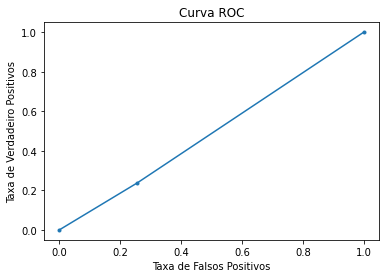

In [150]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

**Área sob a curva (Area under the curve - AUC)**

In [152]:
#calculando area sob a curva ROC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test,classificacao)
round(auc,3)

0.491

**Validação cruzada**

In [153]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [154]:
#define modelo
classificador = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

In [156]:
#calculando os scores
scores = cross_val_score(classificador,X,Y,cv=10)
scores

array([0.56666667, 0.63333333, 0.63333333, 0.73333333, 0.63333333,
       0.76666667, 0.6       , 0.63333333, 0.66666667, 0.65517241])

In [157]:
round(scores.mean(),3),round(scores.std(),3)

(0.652, 0.056)

# **Comparando MLP com Árvore de Decisão e Random Forest**

**Validação Cruzada**

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [160]:
#criando árvore
arvore = DecisionTreeClassifier()

#calculando os scores
scores_arvore = cross_val_score(arvore,X,Y,cv=10)

In [162]:
#criando random forest
floresta = RandomForestClassifier()

#calculando os scores
scores_floresta = cross_val_score(floresta,X,Y,cv=10)

In [163]:
#criando rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

#calculando os scores
scores_mlp = cross_val_score(mlp,X,Y,cv=10)

In [164]:
print('Árvore de Decisão: ', round(scores_arvore.mean(),3),round(scores_arvore.std(),3))
print('Random Forest: ', round(scores.mean(),3),round(scores.std(),3))
print('MLP:', round(scores_mlp.mean(),3),round(scores_mlp.std(),3))

Árvore de Decisão:  0.656 0.072
Random Forest:  0.652 0.056
MLP: 0.686 0.048


**Otimização de Parâmetros**

In [165]:
from sklearn.model_selection import RandomizedSearchCV

In [167]:
param_grid = [
              {
                  'hidden_layer_sizes': [(10),(50),(100),(50,10),(100,50)],
                  'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'solver': ['lbfgs', 'sgd', 'adam'],
                  'max_iter': [500,1000,2000]
              }
              
]

In [169]:
mlp = RandomizedSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')
mlp.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:47

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                           verbose=False, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{

In [170]:
print(mlp.best_params_)

{'solver': 'sgd', 'max_iter': 2000, 'hidden_layer_sizes': 10, 'activation': 'identity'}


In [171]:
print(round(mlp.best_score_,3))

0.689


Grid Search testa todas as soluções, guardando a melhor

In [172]:
from sklearn.model_selection import GridSearchCV
mlp = GridSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')
mlp.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale 

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'activation': [

In [174]:
print(mlp.best_params_)


{'activation': 'tanh', 'hidden_layer_sizes': 50, 'max_iter': 1000, 'solver': 'sgd'}


In [175]:
print(mlp.best_score_)


0.7157627118644069
